In [0]:
import sys
sys.path.append('..')

import cv2

import os
import numpy as np
from skimage.io import imread
from skimage import color
from skimage import io

import matplotlib.pyplot as plt

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

from tensorflow.python.keras.applications.imagenet_utils import decode_predictions
from efficientnet import EfficientNetB3 as Net
from efficientnet import center_crop_and_resize, preprocess_input

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [152]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
  !git clone https://github.com/EmilStalvinge/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/efficentNetb4.h5")

In [157]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b4 (Model)      (None, 4, 4, 1792)        17672952  
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1792)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1792)              0         
_________________________________________________________________
fc_out (Dense)               (None, 6)                 10758     
Total params: 17,683,710
Trainable params: 17,558,510
Non-trainable params: 125,200
_________________________________________________________________


In [0]:
# test image

image = imread("/content/sample_data/cropped_8.jpg", as_gray=True)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [0]:
#IMG_SIZE = 128
#img_gray = cv2.imread("/content/sample_data/cropped_1.jpg", cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

deer
[[3.3590513e-01 2.3773458e-04 1.3060146e-02 6.5055287e-01 2.3319642e-04
  1.0952374e-05]]
0.65055287


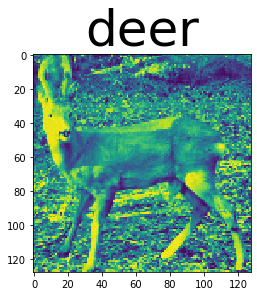

In [183]:
# preprocess input

image = imread("/content/sample_data/cropped_3.jpg", as_gray=True)

image_size = model.input_shape[1]

#x = center_crop_and_resize(image, image_size=image_size)
#x = preprocess_input(image)
#x = np.expand_dims(x, 3)
x = np.expand_dims(image, 0)
x = np.expand_dims(x, 3)

# make prediction and decode

y = model.predict(x)



CATEGORIES = ["fox", "hare", "lynx", "deer", "bear", "boar"]

#decode_predictions(y)
max_value = np.amax(y)
index = np.where(y == np.amax(y))
that_animal_is = CATEGORIES[index[1][0]]
print(that_animal_is)
print(y)
print(max_value)

plt.imshow(image)
plt.title(that_animal_is, fontsize=50)
plt.show()

In [134]:
#decode_predictions(y)
#decode_predictions(y)[0][0]
decode_predictions(y, top=1)[0][0][1]


ValueError: ignored

fox
[[0.6264356  0.19827342 0.01896819 0.05493787 0.00103533 0.10034966]]
0.6264356


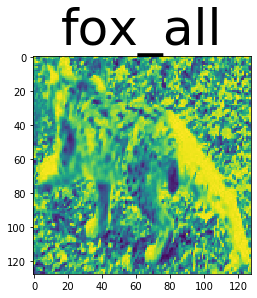

In [0]:
os.path.split(file)[-1]